<h1>Exercise Week 38</h1>

<h2>Analytical part</h2>

Show that $$\mathbb{E}[(\mathbf{y} - \mathbf{\tilde{y}})^2] = \text{Bias} [\tilde{y}] + \text{var}[\tilde{y}] + \sigma^2 $$

With: $$\text{Bias}[\tilde{y}]=\mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}] )^2 ]$$
and $$\text{var}[\tilde{y}] = \mathbb{E}[(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{y}] )^2 ]= 1/n \sum_i (\tilde{y_i} -\mathbb{E}[\mathbf{\tilde{y}}] )^2$$


We begin by rewriting the squared difference $\mathbb{E}[(\mathbf{y} - \mathbf{\tilde{y}})^2]$ by adding and subtracting $\mathbb{E}[\tilde{y}]$

$$
\mathbb{E}[(\mathbf{y} - \mathbf{\tilde{y}})^2] = \mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}] + \mathbb{E}[\tilde{y}] - \mathbf{\tilde{y}})^2]
$$

Then expand the expression

$$
= \mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}])^2 + 2(\mathbf{y} - \mathbb{E}[\tilde{y}])(\mathbb{E}[\tilde{y}] - \mathbf{\tilde{y}}) + (\mathbb{E}[\tilde{y}] - \mathbf{\tilde{y}})^2]
$$



The second term involves the product of $(\mathbf{y} - \mathbb{E}[\tilde{y}])$ and $(\mathbb{E}[\tilde{y}] - \mathbf{\tilde{y}})$. Since $\mathbf{y}$ and $\mathbf{\tilde{y}}$ are independent, then:

$$
\mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}])(\mathbb{E}[\tilde{y}] - \mathbf{\tilde{y}})] = 0
$$

And we are left with

$$
\mathbb{E}[(\mathbf{y} - \mathbf{\tilde{y}})^2] = \mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}])^2] + \mathbb{E}[(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{y}])^2]
$$



The first term $\mathbb{E}[(\mathbf{y} - \mathbb{E}[\tilde{y}])^2]$, represents the bias $$\text{Bias}[\tilde{y}] = \mathbb{E}[(f(x) - \mathbb{E}[\tilde{y}])^2]$$

The second term, $\mathbb{E}[(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{y}])^2]$, represents the variance

$$\text{Var}[\tilde{y}] = \mathbb{E}[(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{y}])^2]$$
  

In equation, $\mathbf{y} = f(x) + \epsilon$,  $\epsilon$ is the noise term with variance $\sigma^2$, and it must be included

And so the final result is

$$
\mathbb{E}[(\mathbf{y} - \mathbf{\tilde{y}})^2] = \text{Bias}^2[\tilde{y}] + \text{Var}[\tilde{y}] + \sigma^2
$$


<h2>Computational part</h2>

Degree: 1, Error: 0.060, Bias^2: 0.059, Variance: 0.00042
Degree: 2, Error: 0.041, Bias^2: 0.041, Variance: 0.00032
Degree: 3, Error: 0.034, Bias^2: 0.034, Variance: 0.00035
Degree: 4, Error: 0.016, Bias^2: 0.016, Variance: 0.00027
Degree: 5, Error: 0.016, Bias^2: 0.016, Variance: 0.00029
Degree: 6, Error: 0.011, Bias^2: 0.011, Variance: 0.00016
Degree: 7, Error: 0.011, Bias^2: 0.011, Variance: 0.00021
Degree: 8, Error: 0.011, Bias^2: 0.011, Variance: 0.00023
Degree: 9, Error: 0.011, Bias^2: 0.011, Variance: 0.00027
Degree: 10, Error: 0.011, Bias^2: 0.011, Variance: 0.00028
Degree: 11, Error: 0.011, Bias^2: 0.011, Variance: 0.00029
Degree: 12, Error: 0.011, Bias^2: 0.011, Variance: 0.00031
Degree: 13, Error: 0.011, Bias^2: 0.011, Variance: 0.00032
Degree: 14, Error: 0.011, Bias^2: 0.011, Variance: 0.00042
Degree: 15, Error: 0.011, Bias^2: 0.011, Variance: 0.00045


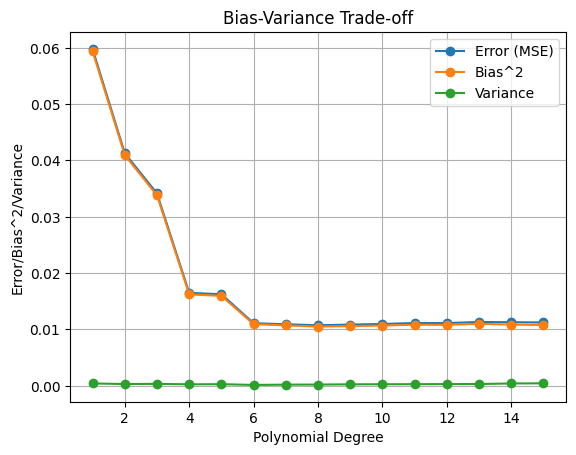

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(0)

n = 500
n_boostraps = 100
max_degree = 15
noise = 0.1

x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

errors = []
biases = []
variances = []
degrees = range(1, max_degree+1)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

    y_pred = np.empty((y_test.shape[0], n_boostraps))
    
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    error = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
    bias = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance = np.mean(np.var(y_pred, axis=1, keepdims=True))

    errors.append(error)
    biases.append(bias)
    variances.append(variance)
    print(f'Degree: {degree}, Error: {error:.3f}, Bias^2: {bias:.3f}, Variance: {variance:.5f}')

# Plot results as a function of polynomial degree
plt.plot(degrees, errors, label='Error (MSE)', marker='o')
plt.plot(degrees, biases, label='Bias^2', marker='o')
plt.plot(degrees, variances, label='Variance', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error/Bias^2/Variance')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()
